# Imports

In [8]:
import numpy as np
import sys
import os
from keras.datasets import mnist

sys.path.append(os.path.abspath(".."))
import utils

# Functions

In [9]:
# Load MNIST dataset
(x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = mnist.load_data()

In [10]:
# Normalize pixel values to [0, 1]
x_train_origin = x_train_origin.astype("float32") / 255.0
x_test_origin = x_test_origin.astype("float32") / 255.0

# Print shapes for confirmation
print(f"x_train_origin shape: {x_train_origin.shape}")
print(f"y_train_origin shape: {y_train_origin.shape}")

x_train_origin shape: (60000, 28, 28)
y_train_origin shape: (60000,)


In [11]:
from sklearn.model_selection import train_test_split

training_samples = 5000

train_data, val_data, train_targets, val_targets = train_test_split(
    x_train_origin[:training_samples],
    y_train_origin[:training_samples],
    test_size=0.2,
    random_state=42,
)

# Flatten the image data from 2D (28x28) to 1D (784) since Dense layers expect flat input
train_data_flat = train_data.reshape(train_data.shape[0], -1)
val_data_flat = val_data.reshape(val_data.shape[0], -1)

In [ ]:
# Display the image using matplotlib
import matplotlib.pyplot as plt

image = train_data[1].reshape(28, 28)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

Prepare model

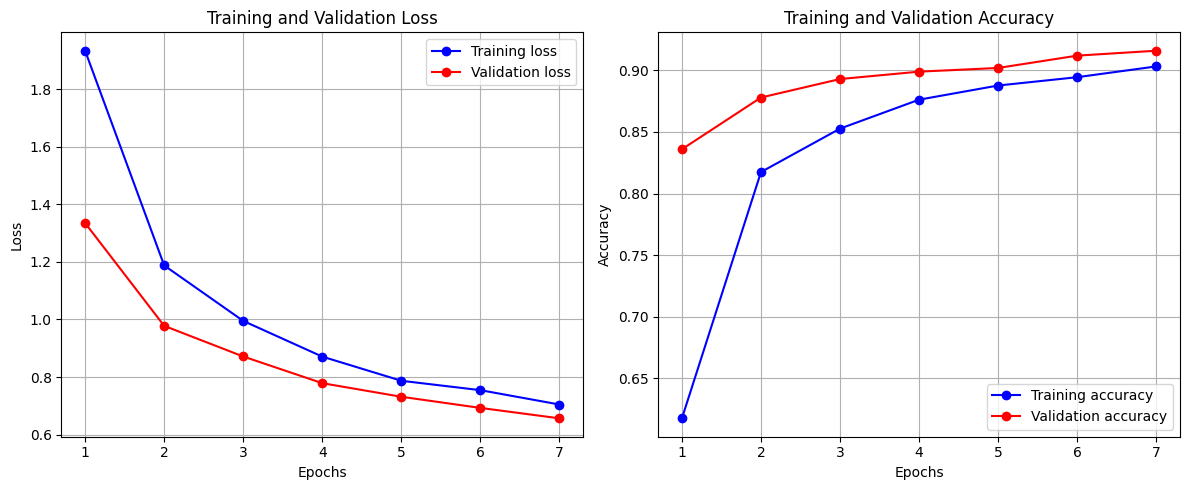

In [15]:
import tensorflow.compat.v1 as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L2


network_1 = models.Sequential(
    [
        InputLayer(input_shape=(28 * 28,)),
        Dense(32, activation="relu", kernel_regularizer=L2(0.01)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation="relu", kernel_regularizer=L2(0.01)),
        Dense(10, activation="softmax", kernel_regularizer=L2(0.01)),
    ]
)

# Compile
network_1.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train
history_network_1 = network_1.fit(
    train_data_flat,
    train_targets,
    epochs=7,
    batch_size=16,
    validation_data=(val_data_flat, val_targets),
    verbose=0,  # 0 = silent, 1 = progress bar, 2 = single line
)


# Call the function with current history
utils.plot_training_history(history_network_1, "loss", "accuracy")


Final Results:
--------------------------------------------------
Training Accuracy: 0.9800
Validation Accuracy: 0.9790
Training Loss: 0.0607
Validation Loss: 0.0651
--------------------------------------------------


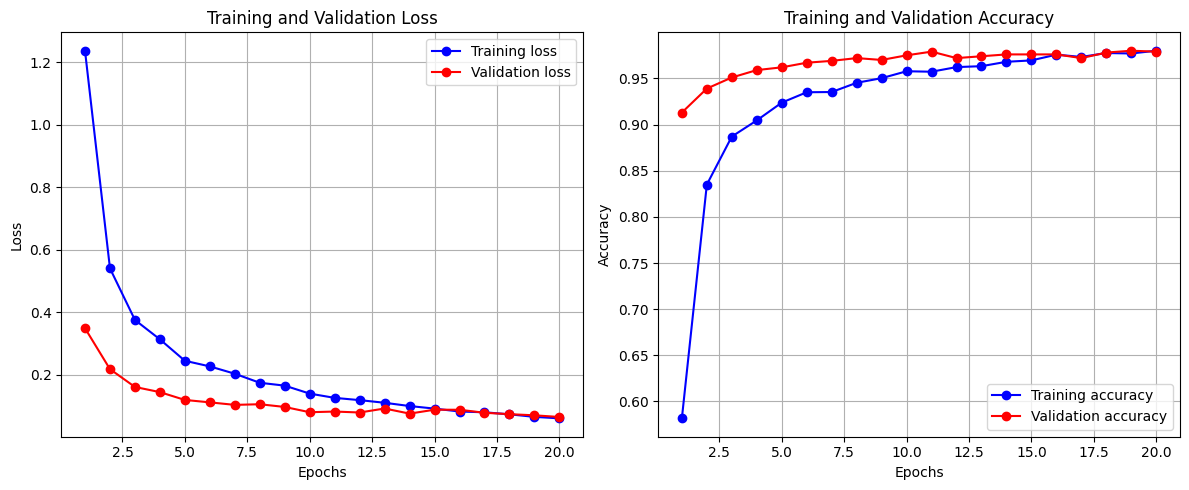

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Conv2D,
    MaxPool2D,  # Changed from MaxPooling2D to MaxPool2D
    Flatten,
    Reshape,
)

"""
L2 regularization:
- Adds penalty term to loss function
- Prevents large weights
- Reduces overfitting by limiting model complexity

Values:
- Low (0.01): Slower learning, lighter regularization
- High (0.1): May prevent learning by forcing weights near zero

Dropout: Randomly "drops" neurons during training. 0.9 drops 90% (very aggressive),
while 0.1 drops 10% (mild regularization).

BatchNormalization: Normalizes the activations of each layer, making training more stable
and allowing higher learning rates by reducing internal covariate shift
"""
network_cnn = Sequential(
    [
        Reshape((28, 28, 1), input_shape=(28 * 28,)),
        Conv2D(32, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Conv2D(64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="softmax"),
    ]
)

# Compile
network_cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


# Train
history_network_cnn = network_cnn.fit(
    train_data_flat,
    train_targets,
    epochs=20,
    batch_size=32,
    validation_data=(val_data_flat, val_targets),
    verbose=0,
)
# Print final training and validation metrics
print("\nFinal Results:")
print("-" * 50)
print(f"Training Accuracy: {history_network_cnn.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history_network_cnn.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history_network_cnn.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history_network_cnn.history['val_loss'][-1]:.4f}")
print("-" * 50)

utils.plot_training_history(history_network_cnn, "loss", "accuracy")

In [ ]:
network_1.summary()

157/157 [==============================] - 0s 2ms/step
Results for Network 1:
--------------------------------------------------
Digit 0, samples: 460, Correct: 447, Accuracy: 0.9717
Digit 1, samples: 571, Correct: 559, Accuracy: 0.9790
Digit 2, samples: 530, Correct: 443, Accuracy: 0.8358
Digit 3, samples: 500, Correct: 452, Accuracy: 0.9040
Digit 4, samples: 500, Correct: 475, Accuracy: 0.9500
Digit 5, samples: 456, Correct: 334, Accuracy: 0.7325
Digit 6, samples: 462, Correct: 407, Accuracy: 0.8810
Digit 7, samples: 512, Correct: 444, Accuracy: 0.8672
Digit 8, samples: 489, Correct: 382, Accuracy: 0.7812
Digit 9, samples: 520, Correct: 430, Accuracy: 0.8269
Overall Test Accuracy Network 1: 0.8746

Results for Network 2:
--------------------------------------------------
Digit 0, samples: 460, Correct: 454, Accuracy: 0.9870
Digit 1, samples: 571, Correct: 564, Accuracy: 0.9877
Digit 2, samples: 530, Correct: 516, Accuracy: 0.9736
Digit 3, samples: 500, Correct: 489, Accuracy: 0.9780


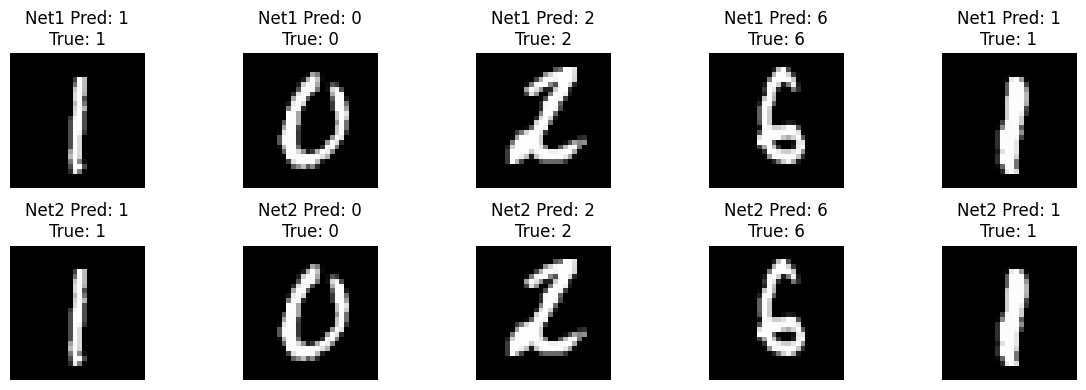

In [18]:
test_images = 5000
x_test = np.copy(x_test_origin[:test_images])
y_test = y_test_origin[:test_images]
# Flatten the test data for prediction
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Get predictions for both networks
predictions_1 = network_1.predict(x_test_flat)
predictions_2 = network_cnn.predict(x_test_flat)

# Convert predictions from one-hot encoded to class labels
predicted_classes_1 = np.argmax(predictions_1, axis=1)
predicted_classes_2 = np.argmax(predictions_2, axis=1)

# Calculate accuracy for each digit for both networks
print("Results for Network 1:")
print("-" * 50)
for digit in range(10):
    # Get indices where true label is the current digit
    digit_indices = np.where(y_test == digit)[0]

    if len(digit_indices) > 0:
        # Calculate accuracy for this digit
        digit_accuracy = np.mean(
            predicted_classes_1[digit_indices] == y_test[digit_indices]
        )
        digit_count = len(digit_indices)
        correct_predictions = int(digit_accuracy * digit_count)

        print(
            f"Digit {digit}, samples: {digit_count}, Correct: {correct_predictions}, Accuracy: {digit_accuracy:.4f}"
        )

# Calculate overall accuracy for network 1
overall_accuracy_1 = np.mean(predicted_classes_1 == y_test)
print(f"Overall Test Accuracy Network 1: {overall_accuracy_1:.4f}")

print("\nResults for Network 2:")
print("-" * 50)
for digit in range(10):
    # Get indices where true label is the current digit
    digit_indices = np.where(y_test == digit)[0]

    if len(digit_indices) > 0:
        # Calculate accuracy for this digit
        digit_accuracy = np.mean(
            predicted_classes_2[digit_indices] == y_test[digit_indices]
        )
        digit_count = len(digit_indices)
        correct_predictions = int(digit_accuracy * digit_count)

        print(
            f"Digit {digit}, samples: {digit_count}, Correct: {correct_predictions}, Accuracy: {digit_accuracy:.4f}"
        )

# Calculate overall accuracy for network 2
overall_accuracy_2 = np.mean(predicted_classes_2 == y_test)
print(f"Overall Test Accuracy Network 2: {overall_accuracy_2:.4f}")

# Plot some example predictions from both networks
plt.figure(figsize=(12, 4))
num_examples = 5

# Get random indices
random_indices = np.random.choice(len(x_test), num_examples, replace=False)

for i, idx in enumerate(random_indices):
    # Network 1 predictions
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"Net1 Pred: {predicted_classes_1[idx]}\nTrue: {y_test[idx]}")
    plt.axis("off")

    # Network 2 predictions
    plt.subplot(2, 5, i + 6)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"Net2 Pred: {predicted_classes_2[idx]}\nTrue: {y_test[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
network_cnn.summary()

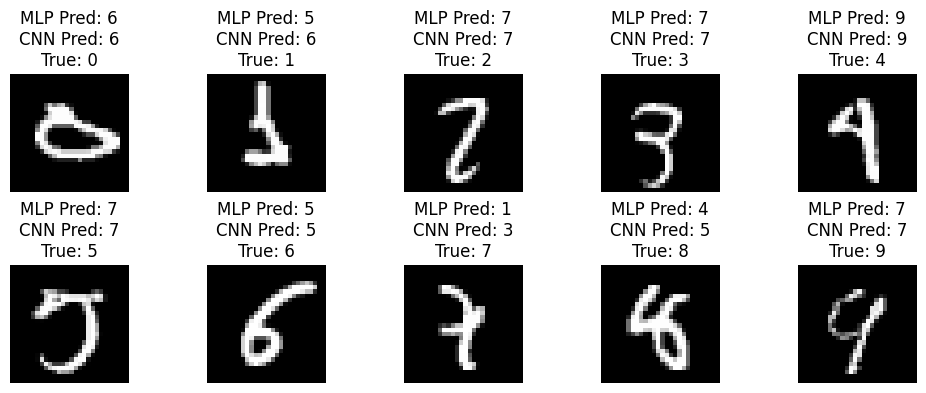

In [21]:
incorrect_indices = [
    np.where(
        (y_test == i)
        & (predicted_classes_1 != y_test)
        & (predicted_classes_2 != y_test)
    )[0][0]
    for i in range(0, 10)
]  # Get first index for digits 1-9 where both networks are wrong

plt.figure(figsize=(10, 4))
for i, idx in enumerate(incorrect_indices):
    # Network 1 predictions
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(
        f"MLP Pred: {predicted_classes_1[idx]}\nCNN Pred: {predicted_classes_2[idx]}\nTrue: {y_test[idx]}"
    )
    plt.axis("off")

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 25ms/step
Prediction probabilities for random test image:
Digit 0: Net1 0.2108%, Net2 0.0000%
Digit 1: Net1 0.1429%, Net2 0.0000%
Digit 2: Net1 0.9094%, Net2 0.0000%
Digit 3: Net1 0.0416%, Net2 0.0000%
Digit 4: Net1 0.1314%, Net2 0.0000%
Digit 5: Net1 0.3510%, Net2 0.0000%
Digit 6: Net1 97.8785%, Net2 100.0000%
Digit 7: Net1 0.0292%, Net2 0.0000%
Digit 8: Net1 0.2032%, Net2 0.0000%
Digit 9: Net1 0.1020%, Net2 0.0000%

Predicted digits: Net1: 6, Net2: 6


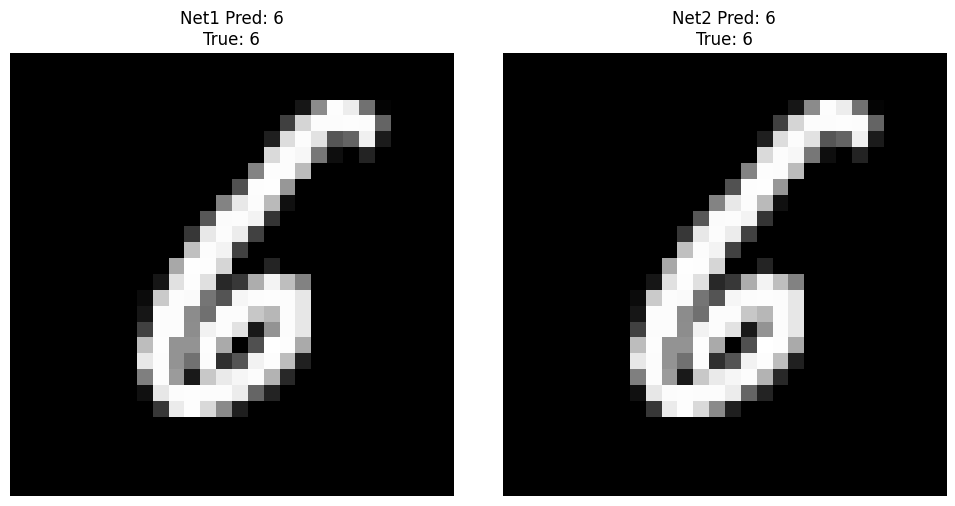

In [23]:
# Get random sample from test set
random_idx = np.random.randint(0, len(x_test))
random_sample = x_test_flat[random_idx : random_idx + 1]

# Get predictions from both networks
predictions_1 = network_1.predict(random_sample)
predictions_2 = network_cnn.predict(random_sample)

print("Prediction probabilities for random test image:")
print(f"Digit 0: Net1 {predictions_1[0][0]:.4%}, Net2 {predictions_2[0][0]:.4%}")
print(f"Digit 1: Net1 {predictions_1[0][1]:.4%}, Net2 {predictions_2[0][1]:.4%}")
print(f"Digit 2: Net1 {predictions_1[0][2]:.4%}, Net2 {predictions_2[0][2]:.4%}")
print(f"Digit 3: Net1 {predictions_1[0][3]:.4%}, Net2 {predictions_2[0][3]:.4%}")
print(f"Digit 4: Net1 {predictions_1[0][4]:.4%}, Net2 {predictions_2[0][4]:.4%}")
print(f"Digit 5: Net1 {predictions_1[0][5]:.4%}, Net2 {predictions_2[0][5]:.4%}")
print(f"Digit 6: Net1 {predictions_1[0][6]:.4%}, Net2 {predictions_2[0][6]:.4%}")
print(f"Digit 7: Net1 {predictions_1[0][7]:.4%}, Net2 {predictions_2[0][7]:.4%}")
print(f"Digit 8: Net1 {predictions_1[0][8]:.4%}, Net2 {predictions_2[0][8]:.4%}")
print(f"Digit 9: Net1 {predictions_1[0][9]:.4%}, Net2 {predictions_2[0][9]:.4%}")
print(
    f"\nPredicted digits: Net1: {np.argmax(predictions_1[0])}, Net2: {np.argmax(predictions_2[0])}"
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[random_idx].reshape(28, 28), cmap="gray")
plt.title(f"Net1 Pred: {predicted_classes_1[random_idx]}\nTrue: {y_test[random_idx]}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(x_test[random_idx].reshape(28, 28), cmap="gray")
plt.title(f"Net2 Pred: {predicted_classes_2[random_idx]}\nTrue: {y_test[random_idx]}")
plt.axis("off")

plt.tight_layout()
plt.show()